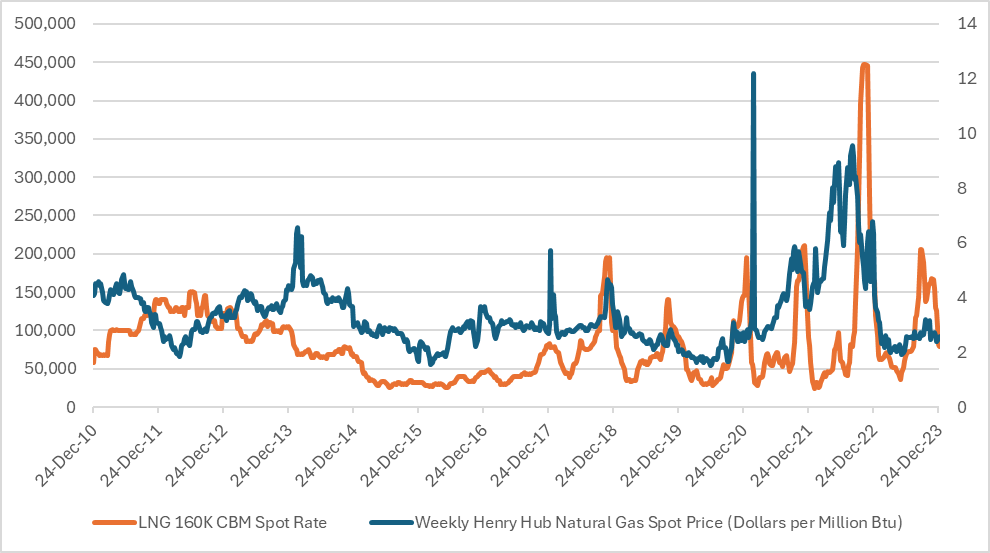

# 1.预测效果比较

## 1.1随机森林

C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\1452231352.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Training MSE: 0.7137914522038928
Training R^2: 0.6159424427002407
Testing MSE: 1.3455293274102558
Testing R^2: 0.13554824452964787


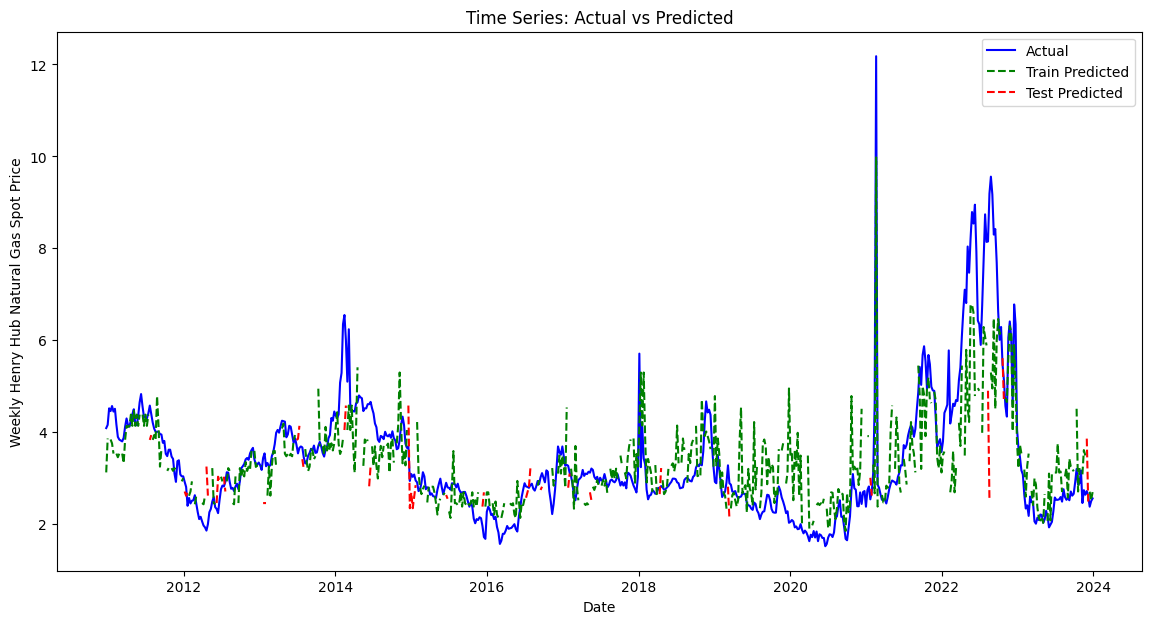

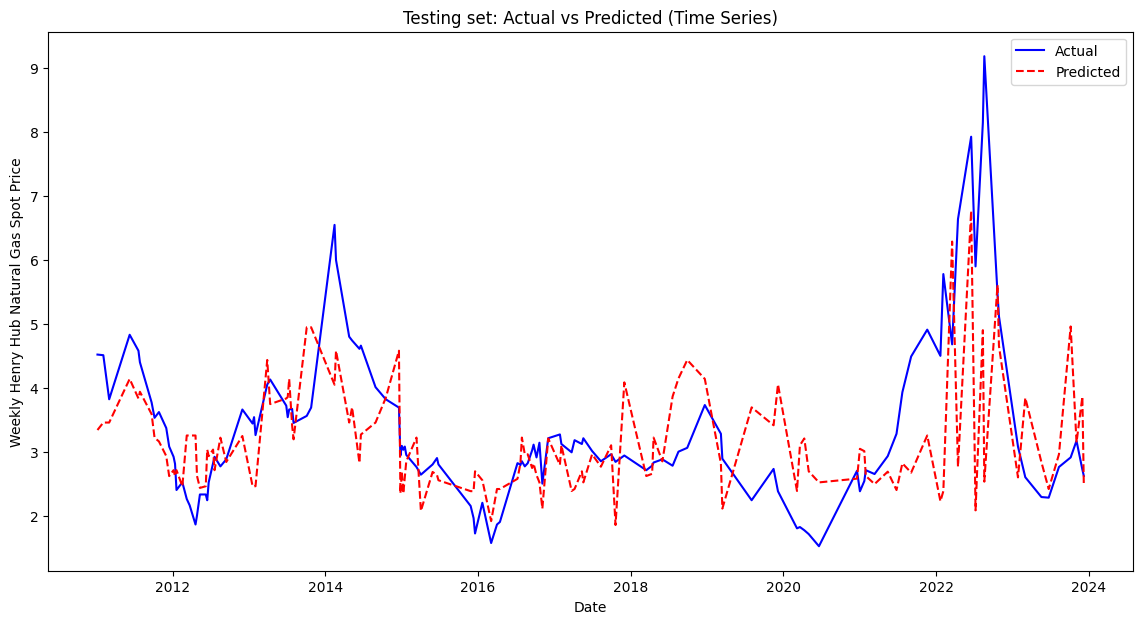

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'E:/jupyter/LNG/Henry_W_combined.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas and convert to numeric
data['LNG 160K CBM Spot Rate'] = data['LNG 160K CBM Spot Rate'].str.replace(',', '').astype(float)
data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].astype(float)

# Select the features and target
X = data[['LNG 160K CBM Spot Rate']]
y = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R^2: {test_r2}')

# Combine the predictions with the original data
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train.index, 'Train_Pred'] = y_train_pred
data.loc[X_test.index, 'Test_Pred'] = y_test_pred

# Sort the data by date
data = data.sort_values('Date')

# Plot time series comparison
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label='Actual', color='blue')
plt.plot(data['Date'], data['Train_Pred'], label='Train Predicted', color='green', linestyle='dashed')
plt.plot(data['Date'], data['Test_Pred'], label='Test Predicted', color='red', linestyle='dashed')
plt.title('Time Series: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()

# Plot test data only
plt.figure(figsize=(14, 7))
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], y_test.sort_index(), label='Actual', color='blue')
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], pd.Series(y_test_pred, index=X_test.index).sort_index(), label='Predicted', color='red', linestyle='dashed')
plt.title('Testing set: Actual vs Predicted (Time Series)')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()


经过test，加入多重分形对于随机森林方法无帮助，代码略

## 1.2全连接神经网络

C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\4252328690.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
D:\anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 13.0709 - val_loss: 8.8530
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0135 - val_loss: 6.5614
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6254 - val_loss: 4.3881
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5027 - val_loss: 2.9463
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8132 - val_loss: 2.6198
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4113 - val_loss: 2.2908
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6842 - val_loss: 2.0326
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9901 - val_loss: 1.7435
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1706 - val_loss: 1.5712
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6530 - val_loss: 1.4594
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2837 - val_loss: 1.3779
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5630 - val_loss: 1.0642
Epoch 70/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9825 - val_loss: 1.0867
Epoch 71/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3746 - val_loss: 1.0864
Epoch 72/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7153 - val_loss: 1.0897
Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5487 - val_loss: 1.0619
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8027 - val_loss: 1.0957
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9804 - val_loss: 1.0757
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7081 - val_loss: 1.0815
Epoch 77/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6076 - val_loss: 1.0857
Epoch 78/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1085 - val_loss: 1.0861
Epoch 79/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8152 - val_loss: 1.0519
Epoch 80/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6287 

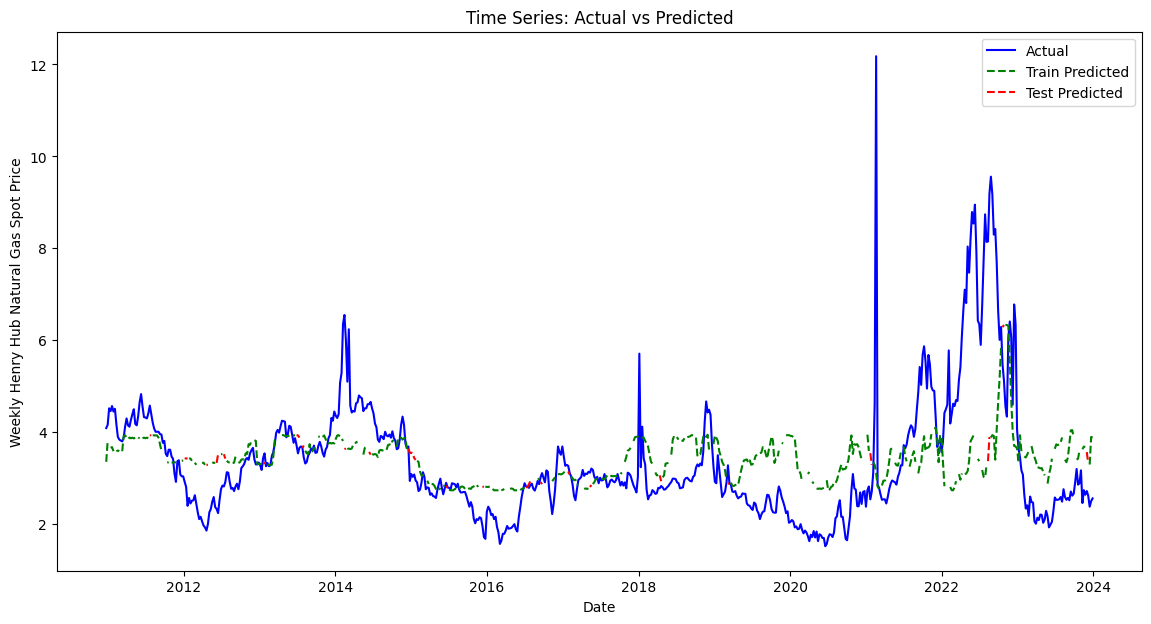

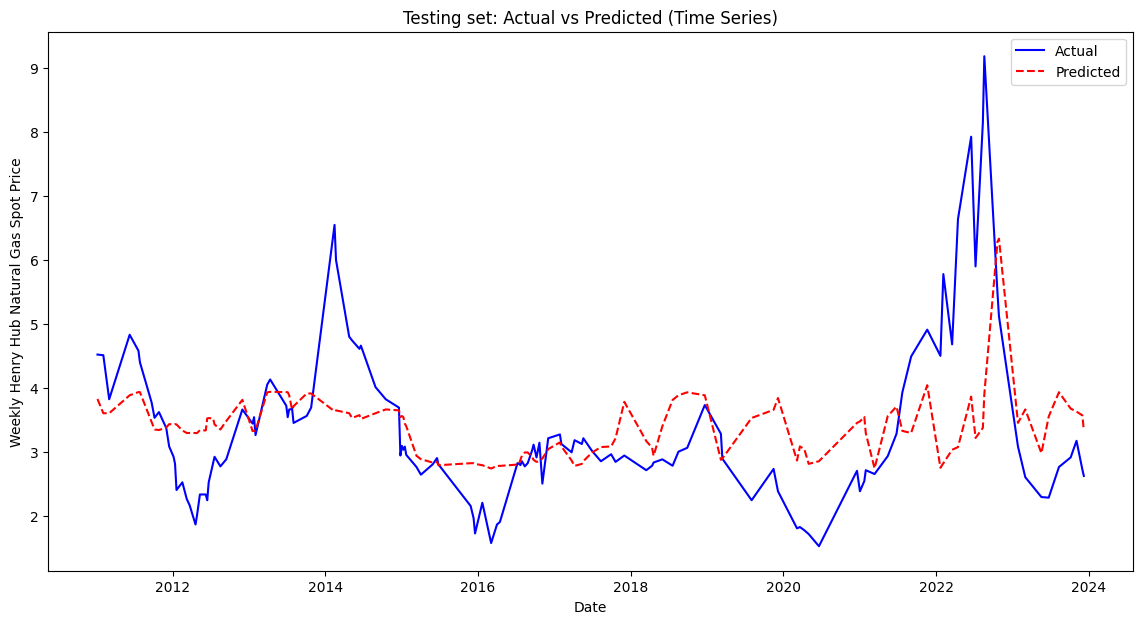

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
file_path = 'E:/jupyter/LNG/Henry_W_combined.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas and convert to numeric
data['LNG 160K CBM Spot Rate'] = data['LNG 160K CBM Spot Rate'].str.replace(',', '').astype(float)
data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].astype(float)

# Select the features and target
X = data[['LNG 160K CBM Spot Rate']]
y = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R^2: {test_r2}')

# Combine the predictions with the original data
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train.index, 'Train_Pred'] = y_train_pred
data.loc[X_test.index, 'Test_Pred'] = y_test_pred

# Sort the data by date
data = data.sort_values('Date')

# Plot time series comparison
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label='Actual', color='blue')
plt.plot(data['Date'], data['Train_Pred'], label='Train Predicted', color='green', linestyle='dashed')
plt.plot(data['Date'], data['Test_Pred'], label='Test Predicted', color='red', linestyle='dashed')
plt.title('Time Series: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()

# Plot test data only
plt.figure(figsize=(14, 7))
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], y_test.sort_index(), label='Actual', color='blue')
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], pd.Series(y_test_pred, index=X_test.index).sort_index(), label='Predicted', color='red', linestyle='dashed')
plt.title('Testing set: Actual vs Predicted (Time Series)')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()


## 1.3Enhanced LSTM Model

C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\3238560215.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Epoch [10/200], Train Loss: 12.4457, Test Loss: 11.0243
Epoch [20/200], Train Loss: 11.4484, Test Loss: 10.0179
Epoch [30/200], Train Loss: 9.5525, Test Loss: 8.0980
Epoch [40/200], Train Loss: 6.4650, Test Loss: 5.2063
Epoch [50/200], Train Loss: 3.4987, Test Loss: 2.9907
Epoch [60/200], Train Loss: 2.9941, Test Loss: 3.0035
Epoch [70/200], Train Loss: 2.4777, Test Loss: 2.2800
Epoch [80/200], Train Loss: 2.2045, Test Loss: 1.7752
Epoch [90/200], Train Loss: 1.9672, Test Loss: 1.5923
Epoch [100/200], Train Loss: 1.8001, Test Loss: 1.4726
Epoch [110/200], Train Loss: 1.6353, Test Loss: 1.3293
Epoch [120/200], Train Loss: 1.6309, Test Loss: 1.2326
Epoch [130/200], Train Loss: 1.5586, Test Loss: 1.1884
Epoch [140/200], Train Loss: 1.4880, Test Loss: 1.1674
Epoch [150/200], Train Loss: 1.4226, Test Loss: 1.1594
Epoch [160/200], Train Loss: 1.4196, Test Loss: 1.1579
Epoch [170/200], Train Loss: 1.3866, Test Loss: 1.1473
Epoch [180/200], Train Loss: 1.3981, Test Loss: 1.1307
Epoch [190/200]

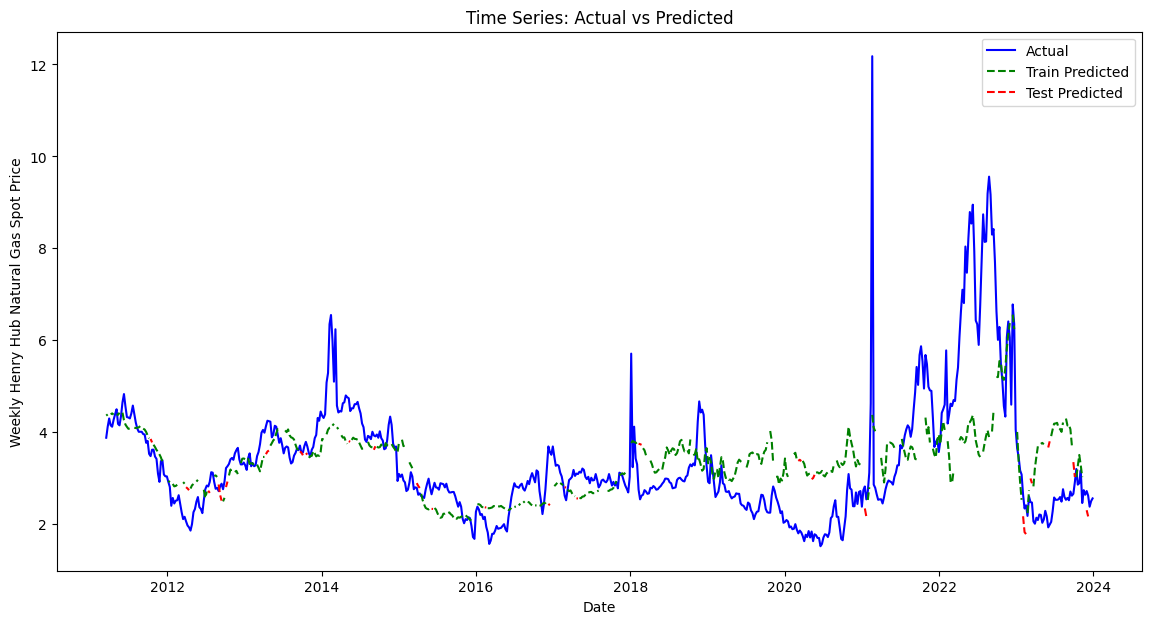

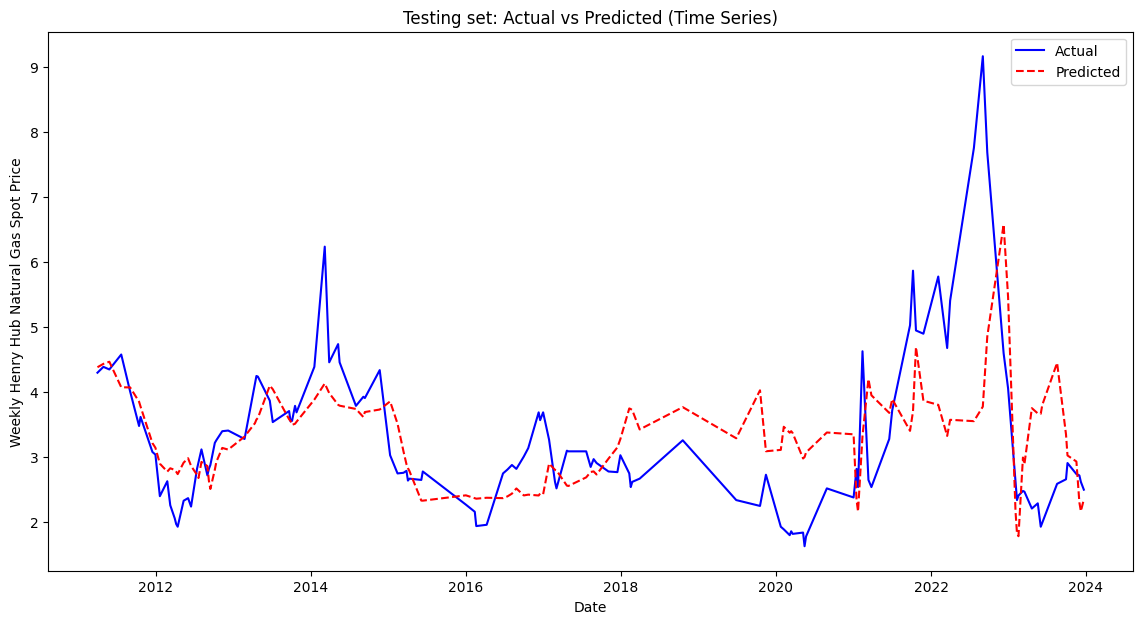

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset
file_path = 'E:/jupyter/LNG/Henry_W_combined.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas and convert to numeric
data['LNG 160K CBM Spot Rate'] = data['LNG 160K CBM Spot Rate'].str.replace(',', '').astype(float)
data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].astype(float)

# Create additional time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Create lag features for LNG 160K CBM Spot Rate
for lag in range(1, 13):
    data[f'LNG 160K CBM Spot Rate Lag {lag}'] = data['LNG 160K CBM Spot Rate'].shift(lag)

# Drop rows with NaN values (due to lag features)
data = data.dropna()

# Select the features and target
X = data[['LNG 160K CBM Spot Rate', 'Year', 'Month'] + 
         [f'LNG 160K CBM Spot Rate Lag {lag}' for lag in range(1, 13)]]
y = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        c_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h_0, c_0))
        lstm_out = self.dropout(lstm_out)
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Hyperparameters
input_size = X_train_scaled.shape[2]
hidden_layer_size = 128
output_size = 1
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 200
batch_size = 32

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor).flatten().numpy()
    y_test_pred = model(X_test_tensor).flatten().numpy()

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R^2: {test_r2}')

# Combine the predictions with the original data
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train.index, 'Train_Pred'] = y_train_pred
data.loc[X_test.index, 'Test_Pred'] = y_test_pred

# Sort the data by date
data = data.sort_values('Date')

# Plot time series comparison
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label='Actual', color='blue')
plt.plot(data['Date'], data['Train_Pred'], label='Train Predicted', color='green', linestyle='dashed')
plt.plot(data['Date'], data['Test_Pred'], label='Test Predicted', color='red', linestyle='dashed')
plt.title('Time Series: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()

# Plot test data only
plt.figure(figsize=(14, 7))
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], y_test.sort_index(), label='Actual', color='blue')
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], pd.Series(y_test_pred, index=X_test.index).sort_index(), label='Predicted', color='red', linestyle='dashed')
plt.title('Testing set: Actual vs Predicted (Time Series)')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()


## 1.4 LSTM Model with MFDFA features

我们直接从1.3继承LSTMModel，这保证了完全一致的基础模型

C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\62153521.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Shape of Hq_features_df: (469, 6)
Epoch [10/200], Train Loss: 12.4167, Test Loss: 11.0028


C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\62153521.py:99: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


Epoch [20/200], Train Loss: 11.3951, Test Loss: 9.9498
Epoch [30/200], Train Loss: 9.3726, Test Loss: 7.8870
Epoch [40/200], Train Loss: 6.1497, Test Loss: 4.8114
Epoch [50/200], Train Loss: 3.2075, Test Loss: 2.6146
Epoch [60/200], Train Loss: 2.6393, Test Loss: 2.5568
Epoch [70/200], Train Loss: 2.2085, Test Loss: 1.9600
Epoch [80/200], Train Loss: 1.9394, Test Loss: 1.5897
Epoch [90/200], Train Loss: 1.7410, Test Loss: 1.4283
Epoch [100/200], Train Loss: 1.5563, Test Loss: 1.2906
Epoch [110/200], Train Loss: 1.4036, Test Loss: 1.1316
Epoch [120/200], Train Loss: 1.2671, Test Loss: 1.0028
Epoch [130/200], Train Loss: 1.1402, Test Loss: 0.9182
Epoch [140/200], Train Loss: 1.0634, Test Loss: 0.8484
Epoch [150/200], Train Loss: 0.9566, Test Loss: 0.7880
Epoch [160/200], Train Loss: 0.8599, Test Loss: 0.7309
Epoch [170/200], Train Loss: 0.7765, Test Loss: 0.6687
Epoch [180/200], Train Loss: 0.7218, Test Loss: 0.6160
Epoch [190/200], Train Loss: 0.6389, Test Loss: 0.5785
Epoch [200/200], 

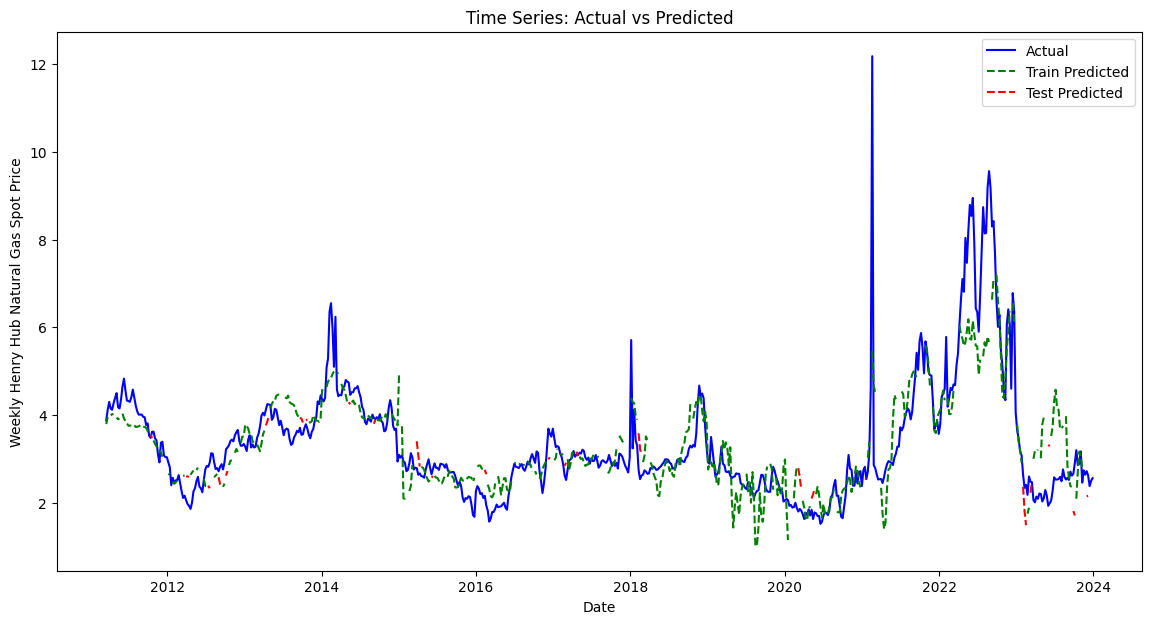

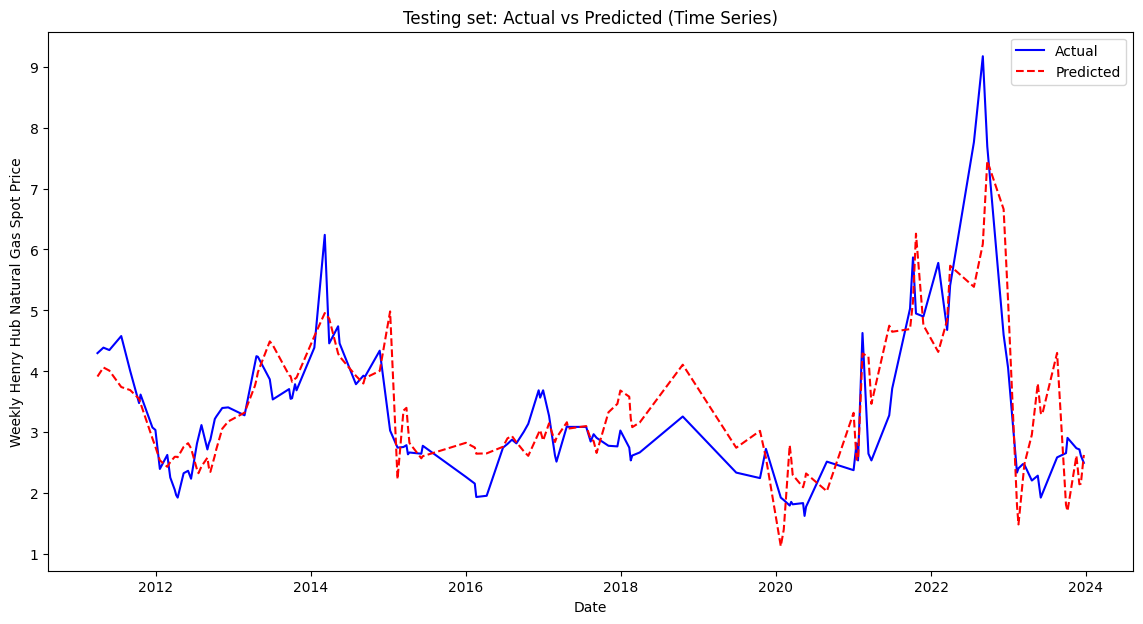

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset
file_path = 'E:/jupyter/LNG/Henry_W_combined.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas and convert to numeric
data['LNG 160K CBM Spot Rate'] = data['LNG 160K CBM Spot Rate'].str.replace(',', '').astype(float)
data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].astype(float)

# Print the first few rows to check the data loading
#print(data.head())

# Create additional time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Create lag features for LNG 160K CBM Spot Rate
for lag in range(1, 13):
    data[f'LNG 160K CBM Spot Rate Lag {lag}'] = data['LNG 160K CBM Spot Rate'].shift(lag)

# Drop rows with NaN values (due to lag features)
data = data.dropna()

# Print the first few rows to check the lag feature creation
# print(data.head())

# Check the length of the data
# print(f"Length of data after preprocessing: {len(data)}")

# Select the LNG spot rate data
lng_spot_rate = data['LNG 160K CBM Spot Rate'].values
# print(f"Length of lng_spot_rate: {len(lng_spot_rate)}")

# Calculate MFDFA features for 'LNG 160K CBM Spot Rate'
def MFDFA(signal, scale_min=10, scale_max=200, scale_res=30, q_list=[-5, -3, -1, 1, 3, 5]):
    scale = np.logspace(np.log10(scale_min), np.log10(scale_max), num=scale_res).astype(int)
    q_list = np.array(q_list)
    
    Fq = np.zeros((len(q_list), len(scale)))
    
    for i, s in enumerate(scale):
        segments = int(np.floor(len(signal) / s))
        RMS = np.zeros(segments)
        
        for v in range(segments):
            segment = signal[v * s:(v + 1) * s]
            coeffs = np.polyfit(np.arange(s), segment, 1)
            fit = np.polyval(coeffs, np.arange(s))
            RMS[v] = np.sqrt(np.mean((segment - fit) ** 2))
        
        for j, q in enumerate(q_list):
            if q == 0:
                Fq[j, i] = np.exp(0.5 * np.mean(np.log(RMS ** 2)))
            else:
                Fq[j, i] = (np.mean(RMS ** q)) ** (1 / q)
    
    Hq = np.zeros(len(q_list))
    for j in range(len(q_list)):
        coeffs = np.polyfit(np.log2(scale), np.log2(Fq[j, :]), 1)
        Hq[j] = coeffs[0]
    
    return Hq

window_size = 200
Hq_features = []

if len(lng_spot_rate) >= window_size:
    for i in range(len(lng_spot_rate) - window_size + 1):
        segment = lng_spot_rate[i:i+window_size]
        Hq = MFDFA(segment)
        Hq_features.append(Hq)

    Hq_features = np.array(Hq_features)
    Hq_features_df = pd.DataFrame(Hq_features, columns=[f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]])
else:
    print("Not enough data for MFDFA calculation.")
    Hq_features_df = pd.DataFrame(columns=[f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]])

# Print the shape of the generated Hq_features to debug
print(f"Shape of Hq_features_df: {Hq_features_df.shape}")

# Add MFDFA features to the dataset
Hq_features_df.index = data.index[window_size - 1:]
data = pd.concat([data, Hq_features_df], axis=1)

# Fill any missing values that were not covered by the MFDFA window
data = data.fillna(method='bfill').fillna(method='ffill')

# # Print the first few rows of the dataset to verify
# print(data.head())

# # Check the start and end dates of the dataset
# print(f"Start date: {data['Date'].min()}, End date: {data['Date'].max()}")

# Select the features and target
X = data[['LNG 160K CBM Spot Rate', 'Year', 'Month'] + 
         [f'LNG 160K CBM Spot Rate Lag {lag}' for lag in range(1, 13)] +
         [f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]]]
y = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        c_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h_0, c_0))
        lstm_out = self.dropout(lstm_out)
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Hyperparameters
input_size = X_train_scaled.shape[2]
hidden_layer_size = 128
output_size = 1
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 200
batch_size = 32

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor).flatten().numpy()
    y_test_pred = model(X_test_tensor).flatten().numpy()

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing MSE: {test_mse}')
print(f'Testing R^2: {test_r2}')

# Combine the predictions with the original data
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train.index, 'Train_Pred'] = y_train_pred
data.loc[X_test.index, 'Test_Pred'] = y_test_pred

# Sort the data by date
data = data.sort_values('Date')

# Plot time series comparison
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label='Actual', color='blue')
plt.plot(data['Date'], data['Train_Pred'], label='Train Predicted', color='green', linestyle='dashed')
plt.plot(data['Date'], data['Test_Pred'], label='Test Predicted', color='red', linestyle='dashed')
plt.title('Time Series: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()

# Plot test data only
plt.figure(figsize=(14, 7))
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], y_test.sort_index(), label='Actual', color='blue')
plt.plot(data.loc[X_test.index].sort_values('Date')['Date'], pd.Series(y_test_pred, index=X_test.index).sort_index(), label='Predicted', color='red', linestyle='dashed')
plt.title('Testing set: Actual vs Predicted (Time Series)')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()


## 1.5汇总输出

C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\2760013003.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\ys156\AppData\Local\Temp\ipykernel_21792\2760013003.py:89: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


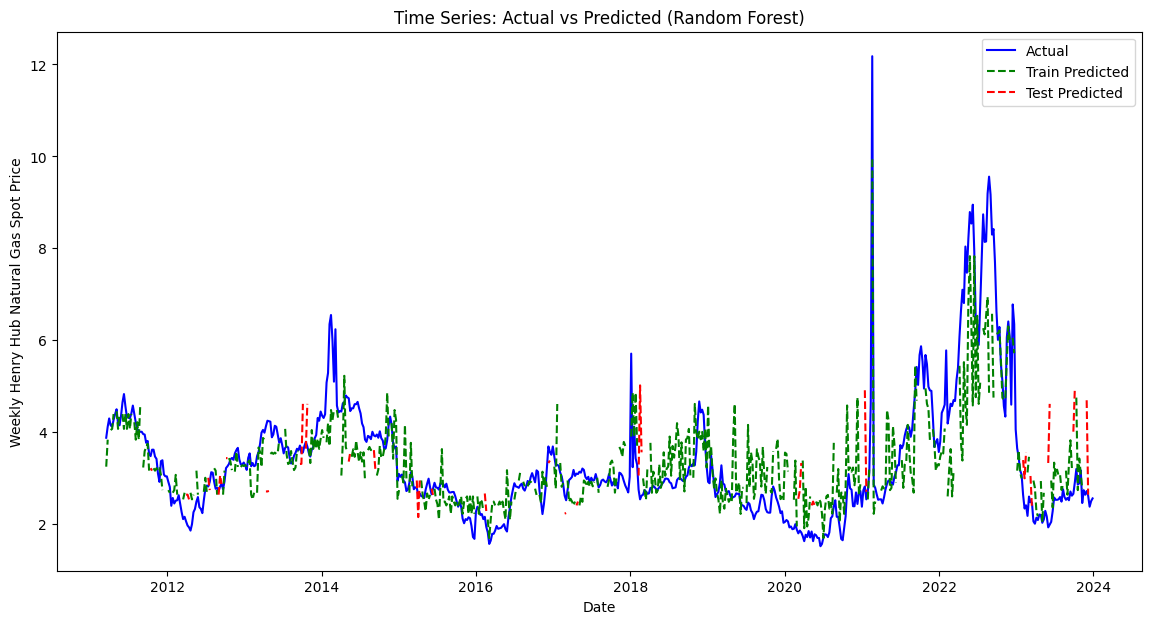

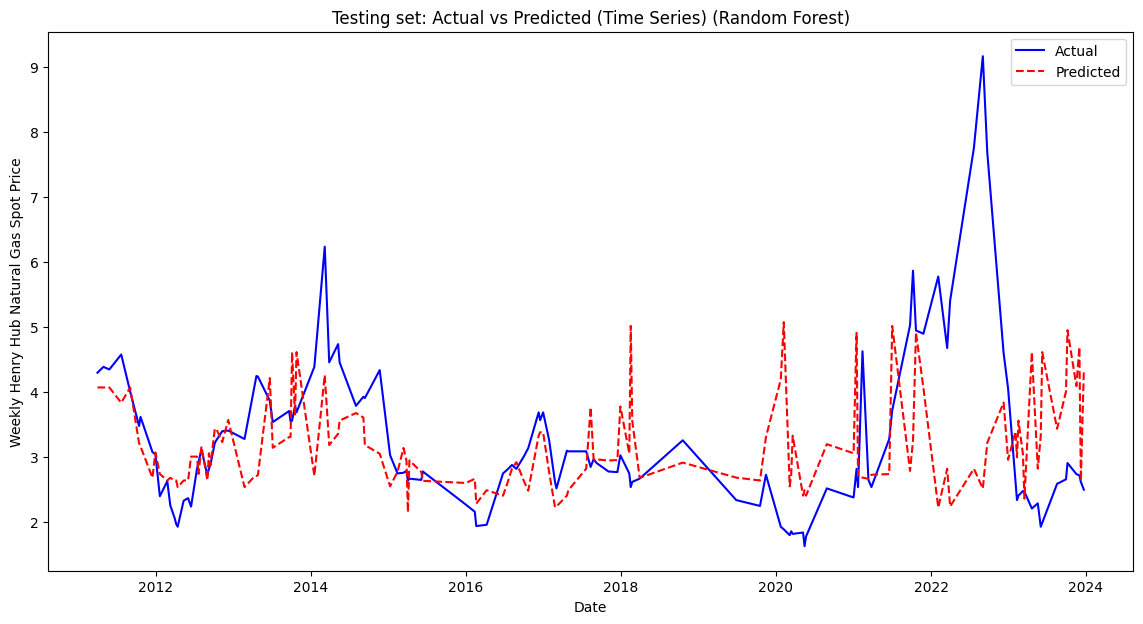

D:\anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


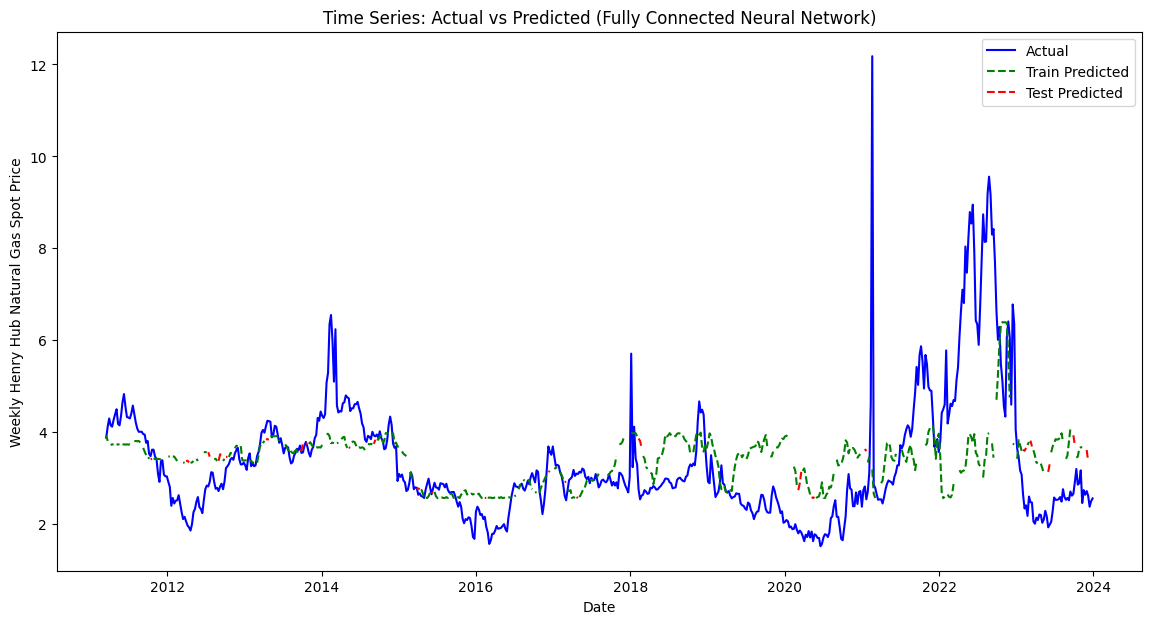

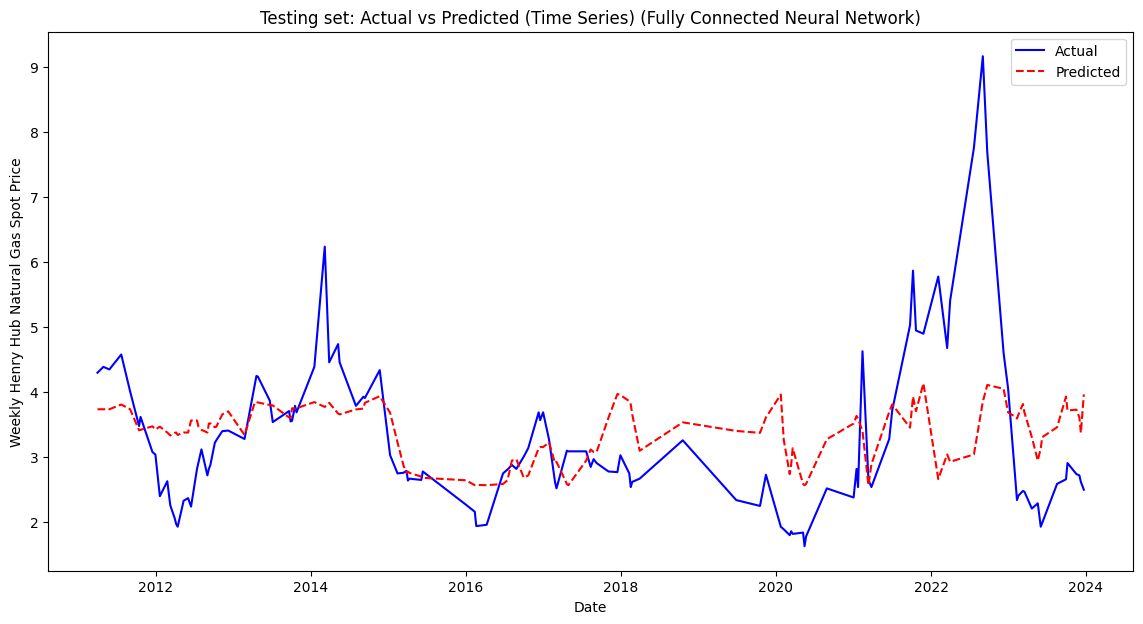

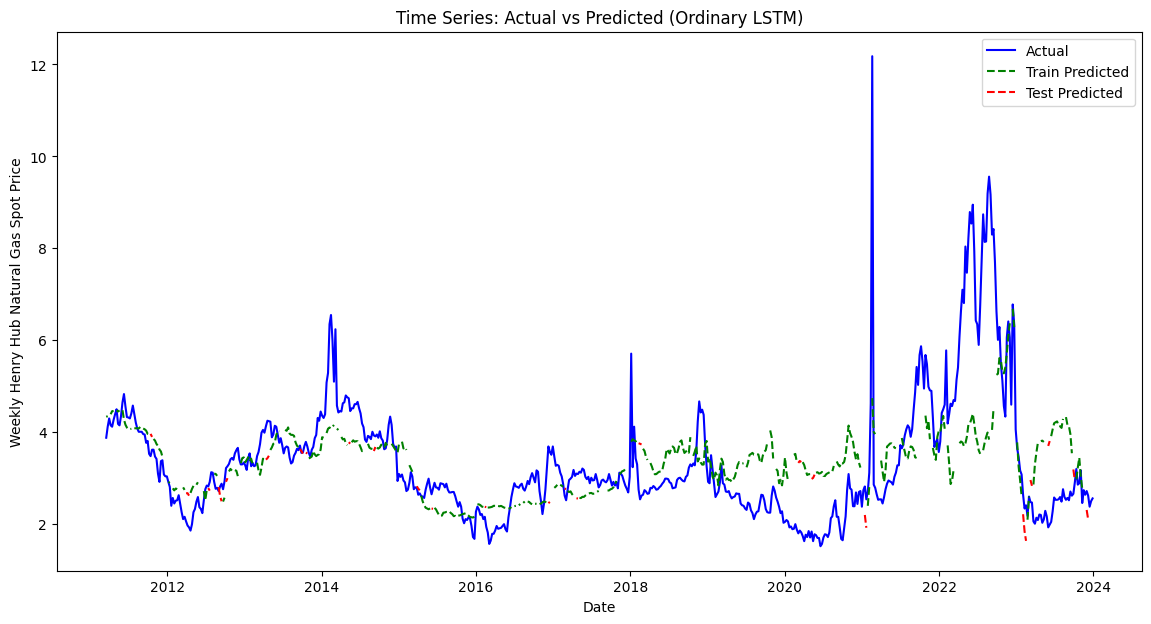

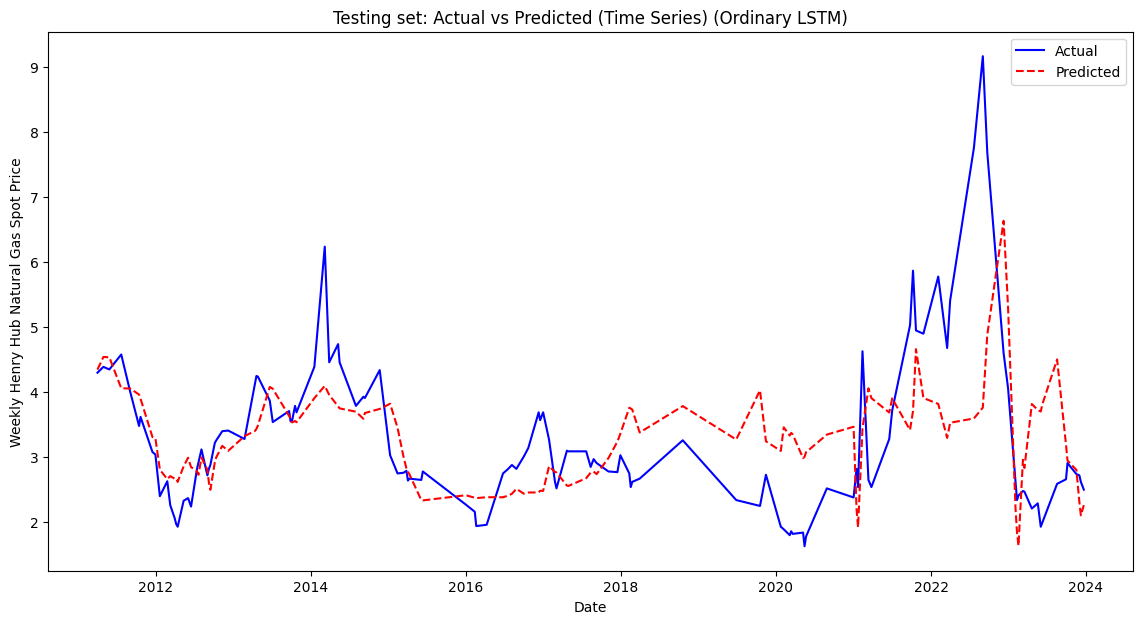

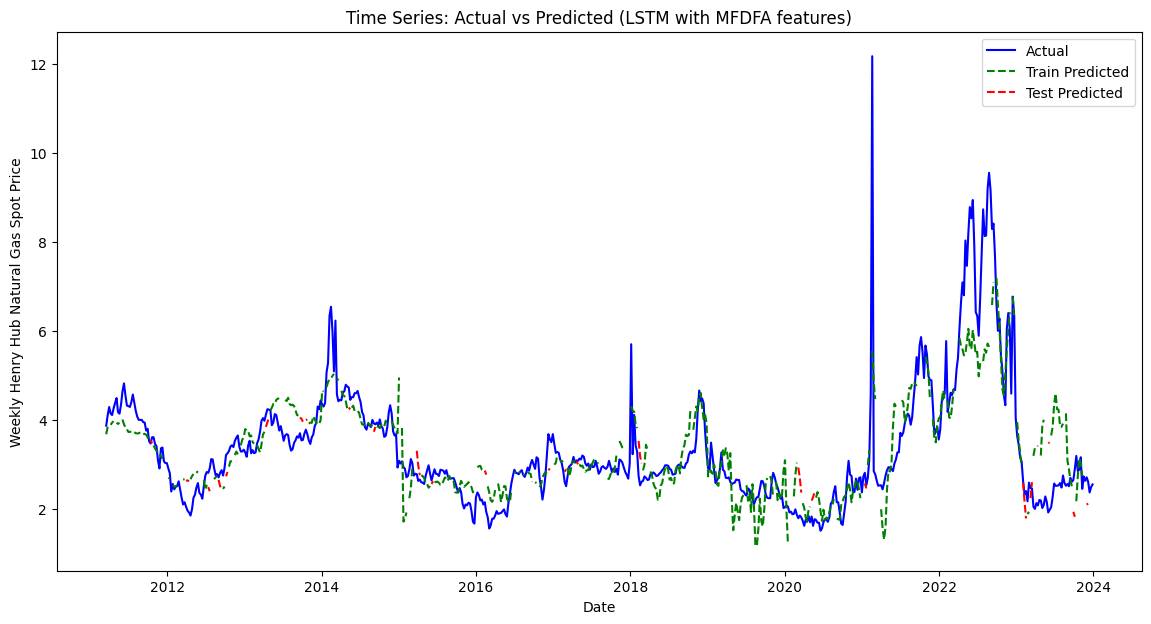

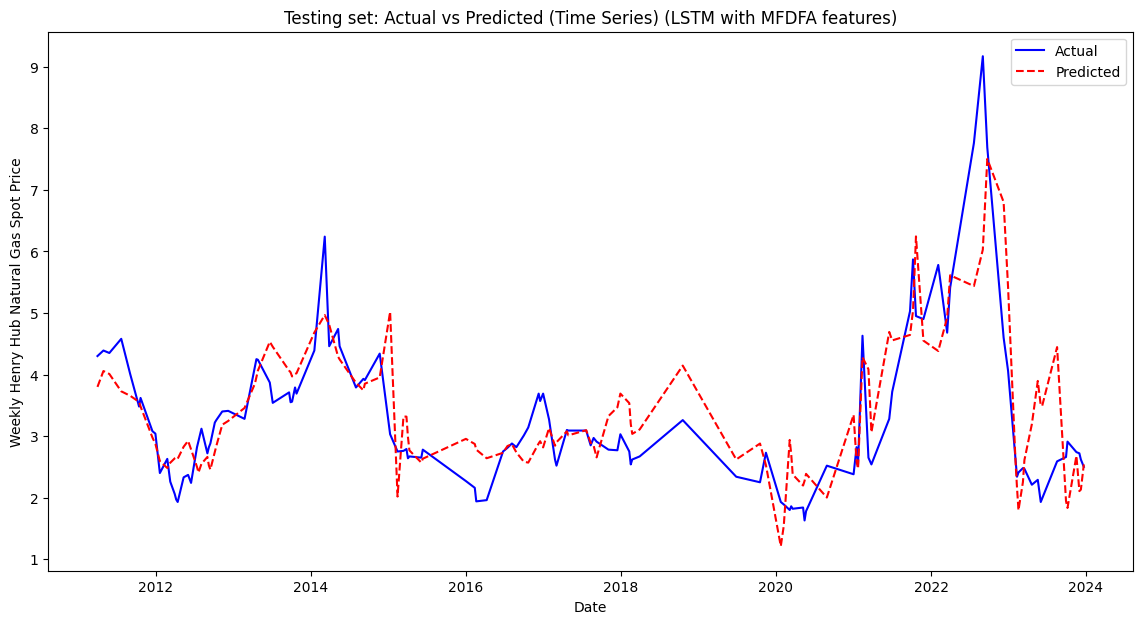

                      Model  Train MSE  Test MSE  Train R^2  Test R^2
0             Random Forest   0.665527  1.746539   0.651620 -0.222280
1        Fully Connected NN   1.625542  1.255646   0.149086  0.121262
2             Ordinary LSTM   1.303048  1.115323   0.317900  0.219463
3  LSTM with MFDFA features   0.583601  0.559764   0.694505  0.608260


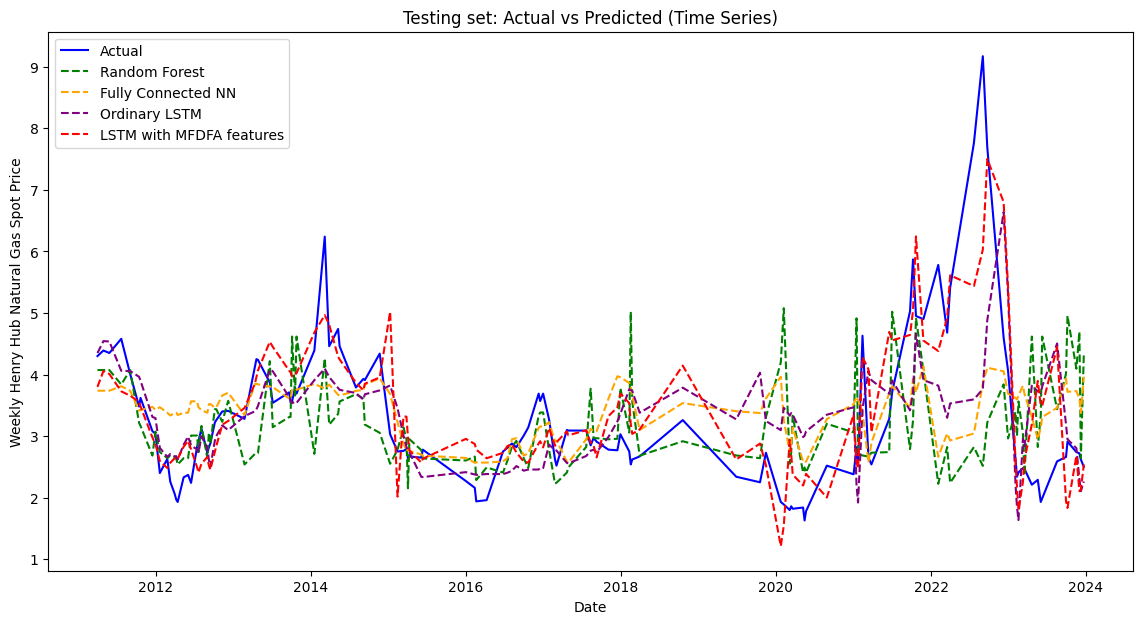

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
file_path = 'E:/jupyter/LNG/Henry_W_combined.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas and convert to numeric
data['LNG 160K CBM Spot Rate'] = data['LNG 160K CBM Spot Rate'].str.replace(',', '').astype(float)
data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].astype(float)

# Create additional time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Create lag features for LNG 160K CBM Spot Rate
for lag in range(1, 13):
    data[f'LNG 160K CBM Spot Rate Lag {lag}'] = data['LNG 160K CBM Spot Rate'].shift(lag)

# Drop rows with NaN values (due to lag features)
data = data.dropna()

# Select the LNG spot rate data
lng_spot_rate = data['LNG 160K CBM Spot Rate'].values

# Calculate MFDFA features for 'LNG 160K CBM Spot Rate'
def MFDFA(signal, scale_min=10, scale_max=200, scale_res=30, q_list=[-5, -3, -1, 1, 3, 5]):
    scale = np.logspace(np.log10(scale_min), np.log10(scale_max), num=scale_res).astype(int)
    q_list = np.array(q_list)
    
    Fq = np.zeros((len(q_list), len(scale)))
    
    for i, s in enumerate(scale):
        segments = int(np.floor(len(signal) / s))
        RMS = np.zeros(segments)
        
        for v in range(segments):
            segment = signal[v * s:(v + 1) * s]
            coeffs = np.polyfit(np.arange(s), segment, 1)
            fit = np.polyval(coeffs, np.arange(s))
            RMS[v] = np.sqrt(np.mean((segment - fit) ** 2))
        
        for j, q in enumerate(q_list):
            if q == 0:
                Fq[j, i] = np.exp(0.5 * np.mean(np.log(RMS ** 2)))
            else:
                Fq[j, i] = (np.mean(RMS ** q)) ** (1 / q)
    
    Hq = np.zeros(len(q_list))
    for j in range(len(q_list)):
        coeffs = np.polyfit(np.log2(scale), np.log2(Fq[j, :]), 1)
        Hq[j] = coeffs[0]
    
    return Hq

window_size = 200
Hq_features = []

if len(lng_spot_rate) >= window_size:
    for i in range(len(lng_spot_rate) - window_size + 1):
        segment = lng_spot_rate[i:i+window_size]
        Hq = MFDFA(segment)
        Hq_features.append(Hq)

    Hq_features = np.array(Hq_features)
    Hq_features_df = pd.DataFrame(Hq_features, columns=[f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]])
else:
    print("Not enough data for MFDFA calculation.")
    Hq_features_df = pd.DataFrame(columns=[f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]])

# Add MFDFA features to the dataset
Hq_features_df.index = data.index[window_size - 1:]
data = pd.concat([data, Hq_features_df], axis=1)

# Fill any missing values that were not covered by the MFDFA window
data = data.fillna(method='bfill').fillna(method='ffill')

# Create additional feature sets including MFDFA features for LSTM
X_lstm_mfdfa = data[['LNG 160K CBM Spot Rate', 'Year', 'Month'] + 
                    [f'LNG 160K CBM Spot Rate Lag {lag}' for lag in range(1, 13)] + 
                    [f'Hq_{q}' for q in [-5, -3, -1, 1, 3, 5]]]
X_lstm = data[['LNG 160K CBM Spot Rate', 'Year', 'Month'] + 
              [f'LNG 160K CBM Spot Rate Lag {lag}' for lag in range(1, 13)]]
y = data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']

X_rf_nn = data[['LNG 160K CBM Spot Rate']]

# Split the data into training and testing sets
X_train_lstm_mfdfa, X_test_lstm_mfdfa, y_train_lstm_mfdfa, y_test_lstm_mfdfa = train_test_split(X_lstm_mfdfa, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)
X_train_rf_nn, X_test_rf_nn, y_train_rf_nn, y_test_rf_nn = train_test_split(X_rf_nn, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_lstm_mfdfa = StandardScaler()
X_train_lstm_mfdfa_scaled = scaler_lstm_mfdfa.fit_transform(X_train_lstm_mfdfa)
X_test_lstm_mfdfa_scaled = scaler_lstm_mfdfa.transform(X_test_lstm_mfdfa)

scaler_lstm = StandardScaler()
X_train_lstm_scaled = scaler_lstm.fit_transform(X_train_lstm)
X_test_lstm_scaled = scaler_lstm.transform(X_test_lstm)

scaler_rf_nn = StandardScaler()
X_train_rf_nn_scaled = scaler_rf_nn.fit_transform(X_train_rf_nn)
X_test_rf_nn_scaled = scaler_rf_nn.transform(X_test_rf_nn)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_lstm_mfdfa_scaled = X_train_lstm_mfdfa_scaled.reshape((X_train_lstm_mfdfa_scaled.shape[0], 1, X_train_lstm_mfdfa_scaled.shape[1]))
X_test_lstm_mfdfa_scaled = X_test_lstm_mfdfa_scaled.reshape((X_test_lstm_mfdfa_scaled.shape[0], 1, X_test_lstm_mfdfa_scaled.shape[1]))

X_train_lstm_scaled = X_train_lstm_scaled.reshape((X_train_lstm_scaled.shape[0], 1, X_train_lstm_scaled.shape[1]))
X_test_lstm_scaled = X_test_lstm_scaled.reshape((X_test_lstm_scaled.shape[0], 1, X_test_lstm_scaled.shape[1]))

# Helper function to plot results
def plot_results(data, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label='Actual', color='blue')
    plt.plot(data['Date'], data['Train_Pred'], label='Train Predicted', color='green', linestyle='dashed')
    plt.plot(data['Date'], data['Test_Pred'], label='Test Predicted', color='red', linestyle='dashed')
    plt.title(f'Time Series: Actual vs Predicted ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data.loc[X_test_rf_nn.index].sort_values('Date')['Date'], y_test.sort_index(), label='Actual', color='blue')
    plt.plot(data.loc[X_test_rf_nn.index].sort_values('Date')['Date'], pd.Series(y_test_pred, index=X_test_rf_nn.index).sort_index(), label='Predicted', color='red', linestyle='dashed')
    plt.title(f'Testing set: Actual vs Predicted (Time Series) ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
    plt.legend()
    plt.show()

# RandomForest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf_nn, y_train_rf_nn)
y_train_rf_pred = model_rf.predict(X_train_rf_nn)
y_test_rf_pred = model_rf.predict(X_test_rf_nn)

train_mse_rf = mean_squared_error(y_train_rf_nn, y_train_rf_pred)
train_r2_rf = r2_score(y_train_rf_nn, y_train_rf_pred)
test_mse_rf = mean_squared_error(y_test_rf_nn, y_test_rf_pred)
test_r2_rf = r2_score(y_test_rf_nn, y_test_rf_pred)

# Combine the predictions with the original data for RF
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train_rf_nn.index, 'Train_Pred'] = y_train_rf_pred
data.loc[X_test_rf_nn.index, 'Test_Pred'] = y_test_rf_pred
data = data.sort_values('Date')
plot_results(data, y_test_rf_nn, y_test_rf_pred, 'Random Forest')

# Fully Connected Neural Network Model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_rf_nn_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mse')
history_nn = model_nn.fit(X_train_rf_nn_scaled, y_train_rf_nn, epochs=100, validation_split=0.2, verbose=0)
y_train_nn_pred = model_nn.predict(X_train_rf_nn_scaled).flatten()
y_test_nn_pred = model_nn.predict(X_test_rf_nn_scaled).flatten()

train_mse_nn = mean_squared_error(y_train_rf_nn, y_train_nn_pred)
train_r2_nn = r2_score(y_train_rf_nn, y_train_nn_pred)
test_mse_nn = mean_squared_error(y_test_rf_nn, y_test_nn_pred)
test_r2_nn = r2_score(y_test_rf_nn, y_test_nn_pred)

# Combine the predictions with the original data for NN
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train_rf_nn.index, 'Train_Pred'] = y_train_nn_pred
data.loc[X_test_rf_nn.index, 'Test_Pred'] = y_test_nn_pred
data = data.sort_values('Date')
plot_results(data, y_test_rf_nn, y_test_nn_pred, 'Fully Connected Neural Network')

# Ordinary LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        c_0 = torch.zeros(2, x.size(0), self.hidden_layer_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h_0, c_0))
        lstm_out = self.dropout(lstm_out)
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

input_size = X_train_lstm_scaled.shape[2]
hidden_layer_size = 128
output_size = 1
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 200

model_lstm = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=learning_rate)

X_train_tensor = torch.tensor(X_train_lstm_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_lstm_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_lstm.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_lstm.values, dtype=torch.float32).view(-1, 1)

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model_lstm.train()
    optimizer.zero_grad()
    y_train_pred = model_lstm(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model_lstm.eval()
    with torch.no_grad():
        y_test_pred = model_lstm(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

model_lstm.eval()
with torch.no_grad():
    y_train_lstm_pred = model_lstm(X_train_tensor).flatten().numpy()
    y_test_lstm_pred = model_lstm(X_test_tensor).flatten().numpy()

train_mse_lstm = mean_squared_error(y_train_lstm, y_train_lstm_pred)
train_r2_lstm = r2_score(y_train_lstm, y_train_lstm_pred)
test_mse_lstm = mean_squared_error(y_test_lstm, y_test_lstm_pred)
test_r2_lstm = r2_score(y_test_lstm, y_test_lstm_pred)

# Combine the predictions with the original data for LSTM
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train_lstm.index, 'Train_Pred'] = y_train_lstm_pred
data.loc[X_test_lstm.index, 'Test_Pred'] = y_test_lstm_pred
data = data.sort_values('Date')
plot_results(data, y_test_lstm, y_test_lstm_pred, 'Ordinary LSTM')

# LSTM Model with MFDFA features
input_size = X_train_lstm_mfdfa_scaled.shape[2]
model_lstm_mfdfa = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)
criterion_mfdfa = nn.MSELoss()
optimizer_mfdfa = optim.Adam(model_lstm_mfdfa.parameters(), lr=learning_rate)

X_train_mfdfa_tensor = torch.tensor(X_train_lstm_mfdfa_scaled, dtype=torch.float32)
X_test_mfdfa_tensor = torch.tensor(X_test_lstm_mfdfa_scaled, dtype=torch.float32)
y_train_mfdfa_tensor = torch.tensor(y_train_lstm_mfdfa.values, dtype=torch.float32).view(-1, 1)
y_test_mfdfa_tensor = torch.tensor(y_test_lstm_mfdfa.values, dtype=torch.float32).view(-1, 1)

train_losses_mfdfa = []
test_losses_mfdfa = []
for epoch in range(num_epochs):
    model_lstm_mfdfa.train()
    optimizer_mfdfa.zero_grad()
    y_train_pred_mfdfa = model_lstm_mfdfa(X_train_mfdfa_tensor)
    loss_mfdfa = criterion_mfdfa(y_train_pred_mfdfa, y_train_mfdfa_tensor)
    loss_mfdfa.backward()
    optimizer_mfdfa.step()
    train_losses_mfdfa.append(loss_mfdfa.item())

    model_lstm_mfdfa.eval()
    with torch.no_grad():
        y_test_pred_mfdfa = model_lstm_mfdfa(X_test_mfdfa_tensor)
        test_loss_mfdfa = criterion_mfdfa(y_test_pred_mfdfa, y_test_mfdfa_tensor)
        test_losses_mfdfa.append(test_loss_mfdfa.item())

model_lstm_mfdfa.eval()
with torch.no_grad():
    y_train_lstm_mfdfa_pred = model_lstm_mfdfa(X_train_mfdfa_tensor).flatten().numpy()
    y_test_lstm_mfdfa_pred = model_lstm_mfdfa(X_test_mfdfa_tensor).flatten().numpy()

train_mse_lstm_mfdfa = mean_squared_error(y_train_lstm_mfdfa, y_train_lstm_mfdfa_pred)
train_r2_lstm_mfdfa = r2_score(y_train_lstm_mfdfa, y_train_lstm_mfdfa_pred)
test_mse_lstm_mfdfa = mean_squared_error(y_test_lstm_mfdfa, y_test_lstm_mfdfa_pred)
test_r2_lstm_mfdfa = r2_score(y_test_lstm_mfdfa, y_test_lstm_mfdfa_pred)

# Combine the predictions with the original data for LSTM with MFDFA
data['Train_Pred'] = None
data['Test_Pred'] = None
data.loc[X_train_lstm_mfdfa.index, 'Train_Pred'] = y_train_lstm_mfdfa_pred
data.loc[X_test_lstm_mfdfa.index, 'Test_Pred'] = y_test_lstm_mfdfa_pred
data = data.sort_values('Date')
plot_results(data, y_test_lstm_mfdfa, y_test_lstm_mfdfa_pred, 'LSTM with MFDFA features')

# Summary
results = pd.DataFrame({
    'Model': ['Random Forest', 'Fully Connected NN', 'Ordinary LSTM', 'LSTM with MFDFA features'],
    'Train MSE': [train_mse_rf, train_mse_nn, train_mse_lstm, train_mse_lstm_mfdfa],
    'Test MSE': [test_mse_rf, test_mse_nn, test_mse_lstm, test_mse_lstm_mfdfa],
    'Train R^2': [train_r2_rf, train_r2_nn, train_r2_lstm, train_r2_lstm_mfdfa],
    'Test R^2': [test_r2_rf, test_r2_nn, test_r2_lstm, test_r2_lstm_mfdfa]
})

print(results)

# Visualize all model predictions on the same plot
plt.figure(figsize=(14, 7))
plt.plot(data.loc[X_test_rf_nn.index].sort_values('Date')['Date'], y_test_rf_nn.sort_index(), label='Actual', color='blue')
plt.plot(data.loc[X_test_rf_nn.index].sort_values('Date')['Date'], pd.Series(y_test_rf_pred, index=X_test_rf_nn.index).sort_index(), label='Random Forest', color='green', linestyle='dashed')
plt.plot(data.loc[X_test_rf_nn.index].sort_values('Date')['Date'], pd.Series(y_test_nn_pred, index=X_test_rf_nn.index).sort_index(), label='Fully Connected NN', color='orange', linestyle='dashed')
plt.plot(data.loc[X_test_lstm.index].sort_values('Date')['Date'], pd.Series(y_test_lstm_pred, index=X_test_lstm.index).sort_index(), label='Ordinary LSTM', color='purple', linestyle='dashed')
plt.plot(data.loc[X_test_lstm_mfdfa.index].sort_values('Date')['Date'], pd.Series(y_test_lstm_mfdfa_pred, index=X_test_lstm_mfdfa.index).sort_index(), label='LSTM with MFDFA features', color='red', linestyle='dashed')
plt.title('Testing set: Actual vs Predicted (Time Series)')
plt.xlabel('Date')
plt.ylabel('Weekly Henry Hub Natural Gas Spot Price')
plt.legend()
plt.show()
